In [26]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve

Local Polynomial Approximation
-------------------------------
Set the parameters

In [27]:
# maximum degree of polynomial used for fitting
# N = 1

# filter size
# M = 51

# large M, small N -> a lot of bias when frequency increases
# N = 2
# M = 51

# large M, large N -> smaller bias than before, but a lot of variance in smooth regions
N = 7
M = 51

# small M, small N -> smaller bias everywhere, higher variance
# N = 2
# M = 5

# M small, M = N,  -> smaller bias than before, higher variance than before
# N = 5
# N = M

Generate synthetic signal signal

In [28]:
LENGHT = 1000

ty = np.linspace(0, 1, LENGHT)
y = np.sin(2 / (ty + 0.05))

#  noise standard deviation
sigma = 0.1

# noisy signal
s = y + sigma*np.random.normal(size=LENGHT)


Text(0.5, 1.0, 'Input Signal')

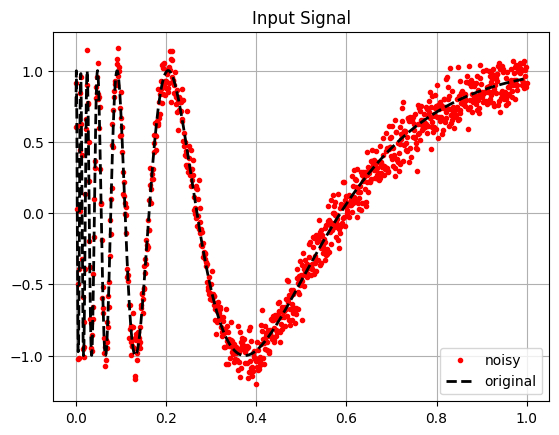

In [29]:
plt.figure()
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=2)
plt.grid()
plt.legend(['noisy', 'original'])
plt.title('Input Signal')

Define the matrix T containing the polynomials sampled over the window


In [30]:
t = np.linspace(0, 1, M) 
T = np.vander(t, N+1, increasing=True)

Look at the matrix T, the columns correspond to polynomials sampled over the interval [0,1]


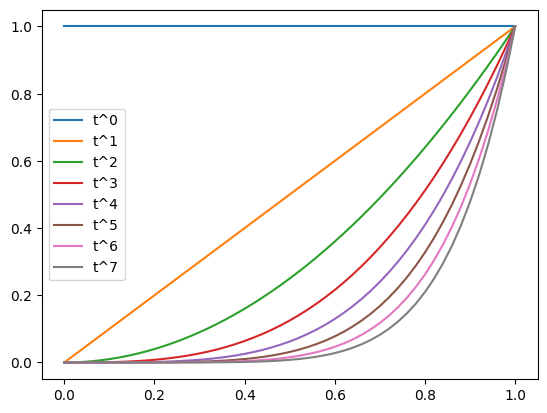

In [31]:
plt.figure()
leg = []
for l in range(N+1):
    plt.plot(t, T[:, l])
    leg.append(f't^{l:d}')
plt.legend(leg)

Construct the LPA kernel

In [32]:
# comput the qr decomposition of T
# since T has more rows than columns, then qr computes only the first N + 1 columns of Q and the first N + 1 rows of R.
Q, R = np.linalg.qr(T)

# select the central row of Q
row = Q[M//2, :]

# compute the kernel
g = row @ Q.T

# flipping, since it is used in convolution
g = np.flip(g)

Text(0.5, 1.0, 'M = 51, N = 7')

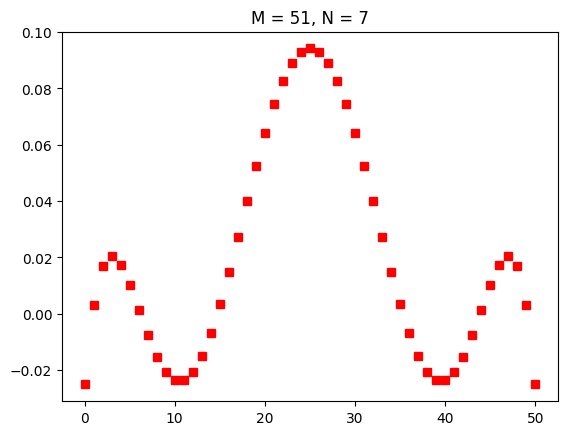

In [33]:
plt.figure()
plt.plot(g, 'rs', linewidth=3)
plt.title(f'M = {M:d}, N = {N:d}')


Filtering

In [34]:
shat = convolve(s, g, mode="same")

Text(0.5, 1.0, 'M = 51, N = 7')

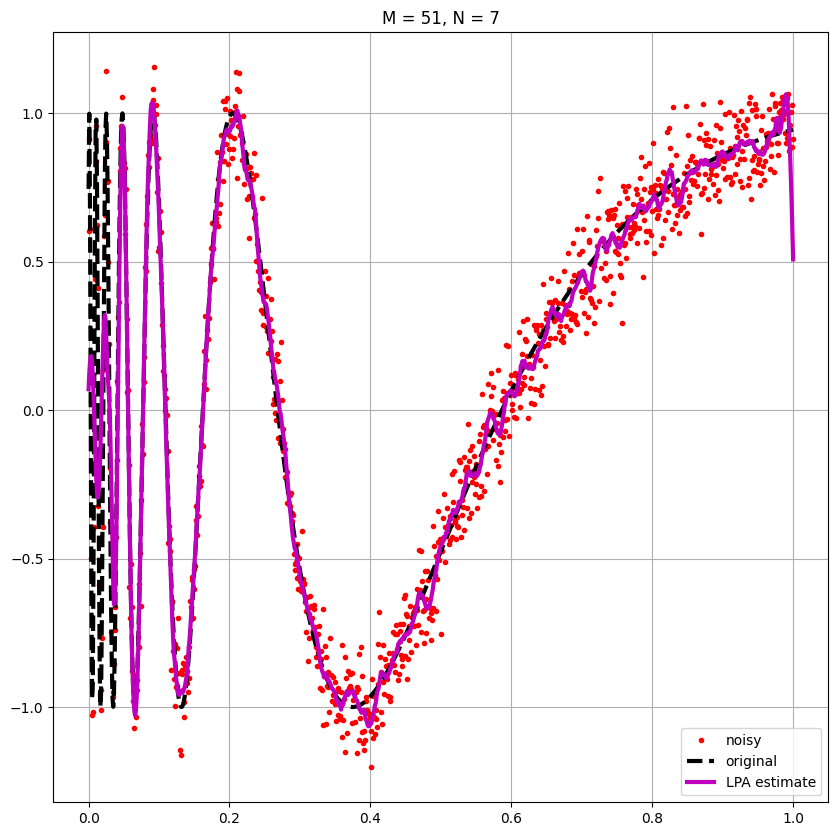

In [35]:
plt.figure(figsize=(10,10))
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=3)
plt.plot(ty, shat, 'm-', linewidth=3)
plt.grid()
plt.legend(['noisy', 'original', 'LPA estimate'])
plt.title(f'M = {M:d}, N = {N:d}')


Weighted LPA
--------------
Set the parameters

In [36]:
# maximum degree of polynomial used for fitting
N = 2

# filter size
M = 53

# half filter size
HFS = int((M-1)/2)

# set the weights. Here weights simply define the window size
w = np.zeros(M)

# centered kernel
wc = w.copy()
wc[int(HFS/2):-int(HFS/2)] = 1

# left kernel
wl = w.copy()
wl[:HFS+1] = 1

# right kernel
wr = w.copy()
wr[-HFS-1:] = 1


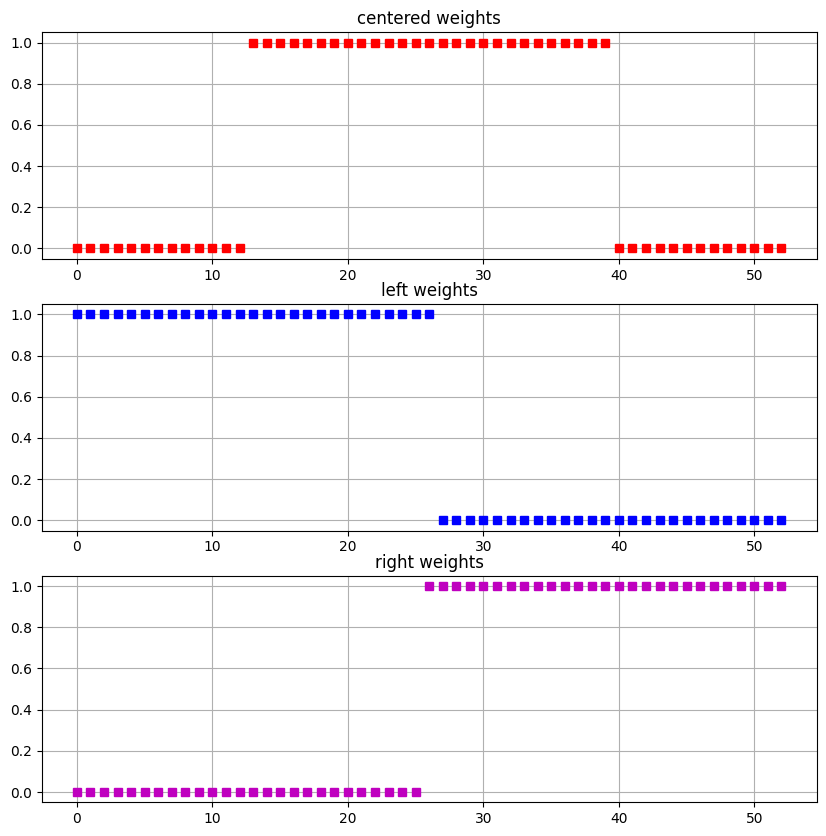

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
ax[0].plot(wc, 'rs', linewidth=3)
ax[0].set_title('centered weights')
ax[0].grid()
ax[1].plot(wl, 'bs', linewidth=3)
ax[1].set_title('left weights')
ax[1].grid()
ax[2].plot(wr, 'ms', linewidth=3)
ax[2].set_title('right weights')
ax[2].grid()


Build the weight matrix

In [38]:
# select a single weight to be used in what follows
w = wc

# generate the inverse of weights
winv = 1/w

# set to zero weights that are inf
winv[np.isinf(winv)] = 0

# define the weight matrix
W = np.diag(w)
Winv = np.diag(winv)

C:\Users\camil\AppData\Local\Temp\ipykernel_25060\2994986781.py:5: RuntimeWarning: divide by zero encountered in divide
  winv = 1/w


Generate synthetic signal signal

In [39]:
LENGHT = 1000

# clean signal
ty = np.linspace(0, 1, LENGHT)
y =  8*ty**2 - 2*ty + 2;
y[LENGHT//2 : LENGHT] = y[LENGHT//2 : LENGHT] + 7;

#  noise standard deviation
sigma = 0.2

# noisy signal
s = y + sigma*np.random.normal(size=LENGHT)

Text(0.5, 1.0, 'Input Signal')

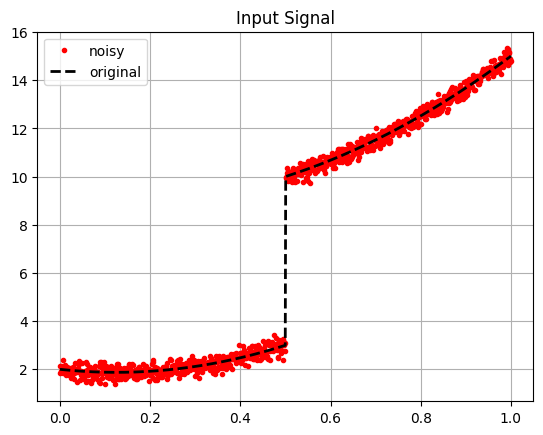

In [40]:

plt.figure()
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=2)
plt.grid()
plt.legend(['noisy', 'original'])
plt.title('Input Signal')

Define the matrix T containing the polynomials sampled over the window

In [41]:
t = np.linspace(0, 1, M) 
T = np.vander(t, N+1, increasing=True)


Construct the LPA kernel

In [42]:
# comput the qr decomposition of WT
# since T has more rows than columns, then qr computes only the first N + 1 columns of Q and the first N + 1 rows of R.
Q, R = np.linalg.qr(W@T)

#  define Qtilde
Qtilde =  Winv @ Q

# adjust Qtilde with the  weights matrix squared.
QtildeW2 = Qtilde.T @ W**2

# select the central row of W2Qtilde
row = Qtilde[M//2, :]

# compute the kernel
g = row @ QtildeW2

# flipping, since it is used in convolution
g = np.flip(g)


Text(0.5, 1.0, 'filter M = 53, N = 2')

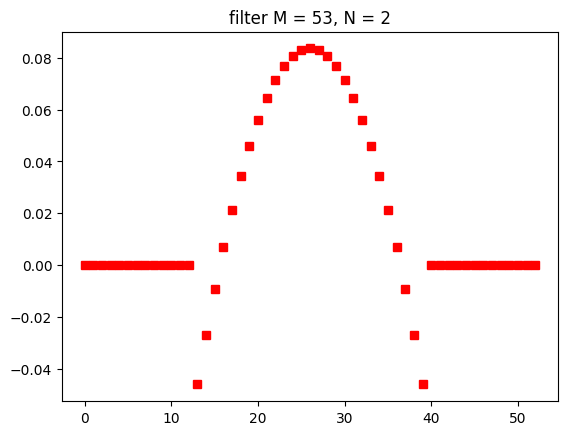

In [43]:
plt.figure()
plt.plot(g, 'rs', linewidth=3)
plt.title(f'filter M = {M:d}, N = {N:d}')


Filtering


In [44]:
shat = convolve(s, g, mode="same")


Text(0.5, 1.0, 'M = 53, N = 2')

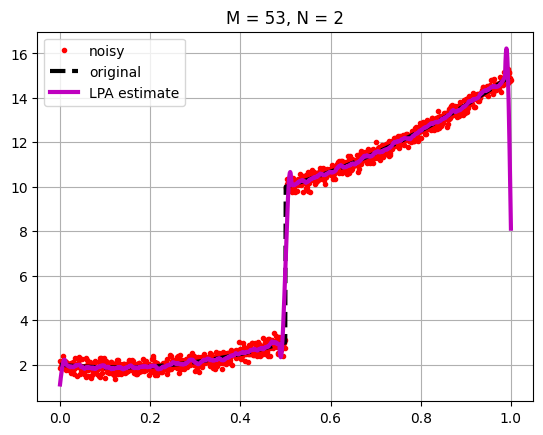

In [45]:
plt.figure()
plt.plot(ty, s, 'r.')
plt.plot(ty, y, 'k--', linewidth=3)
plt.plot(ty, shat, 'm-', linewidth=3)
plt.grid()
plt.legend(['noisy', 'original', 'LPA estimate'])
plt.title(f'M = {M:d}, N = {N:d}')



Modify the code to use the central, left and right kernels

In [46]:
LENGHT = 1000

# clean signal
ty = np.linspace(0, 1, LENGHT)
y =  8*ty**2 - 2*ty + 2;
y[LENGHT//2 : LENGHT] = y[LENGHT//2 : LENGHT] + 7;

#  noise standard deviation
sigma = 0.2

# noisy signal
s = y + sigma*np.random.normal(size=LENGHT)

In [47]:
def lpa (N, M, w, s, legend):
    # generate the inverse of weights
    winv = 1/w

    # set to zero weights that are inf
    winv[np.isinf(winv)] = 0

    # define the weight matrix
    W = np.diag(w)
    Winv = np.diag(winv)
    
    t = np.linspace(0, 1, M) 
    T = np.vander(t, N+1, increasing=True)
    
    # comput the qr decomposition of WT
    # since T has more rows than columns, then qr computes only the first N + 1 columns of Q and the first N + 1 rows of R.
    Q, R = np.linalg.qr(W@T)

    #  define Qtilde
    Qtilde =  Winv @ Q

    # adjust Qtilde with the  weights matrix squared.
    QtildeW2 = Qtilde.T @ W**2 

    # select the central row of W2Qtilde
    row = Qtilde[M//2, :]

    # compute the kernel
    g = row @ QtildeW2

    # flipping, since it is used in convolution
    g = np.flip(g)
    
    shat = np.convolve(g, s, mode="same")
    
    plt.figure()
    plt.plot(g, 'rs', linewidth=3)
    plt.title(f'filter M = {M:d}, N = {N:d}')
    
    plt.figure()
    plt.plot(ty, s, 'r.')
    plt.plot(ty, y, 'k--', linewidth=3)
    plt.plot(ty, shat, 'm-', linewidth=3)
    plt.grid()
    plt.legend(['noisy', 'original', 'LPA estimate'])
    plt.title(f'M = {M:d}, N = {N:d}, w: {legend}')

C:\Users\camil\AppData\Local\Temp\ipykernel_25060\3053840660.py:3: RuntimeWarning: divide by zero encountered in divide
  winv = 1/w


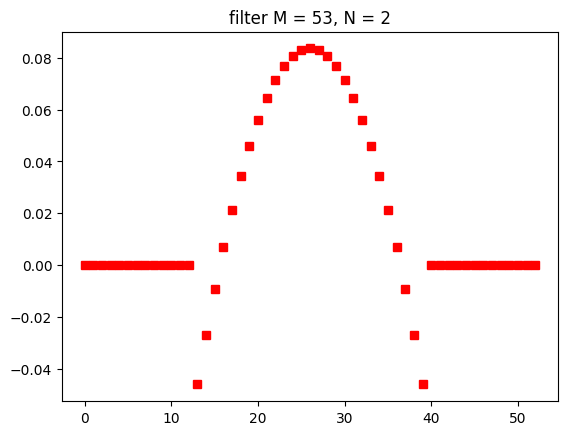

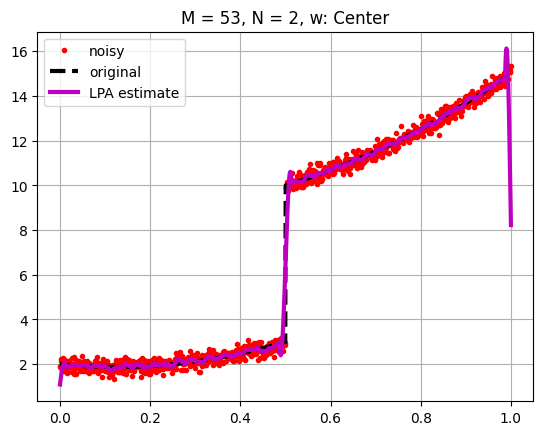

In [48]:
lpa(N, M, wc, s, legend="Center")

C:\Users\camil\AppData\Local\Temp\ipykernel_25060\3053840660.py:3: RuntimeWarning: divide by zero encountered in divide
  winv = 1/w


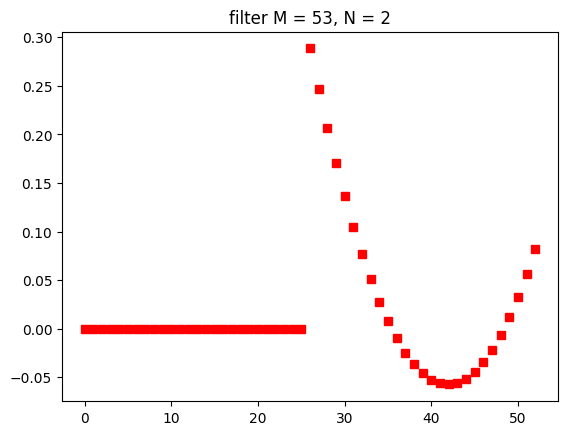

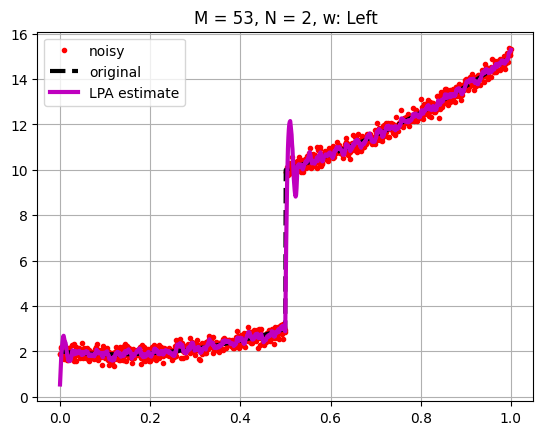

In [49]:
lpa(N, M, wl, s, legend="Left")

C:\Users\camil\AppData\Local\Temp\ipykernel_25060\3053840660.py:3: RuntimeWarning: divide by zero encountered in divide
  winv = 1/w


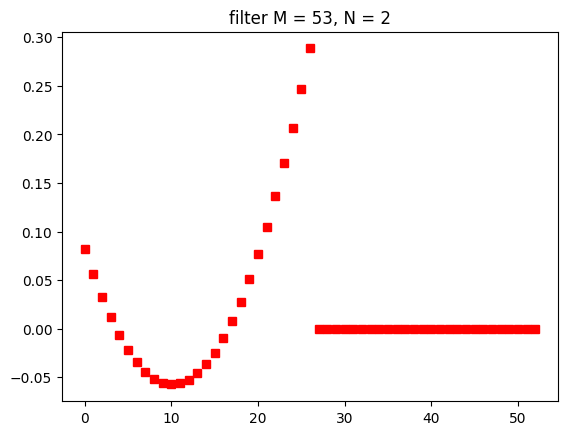

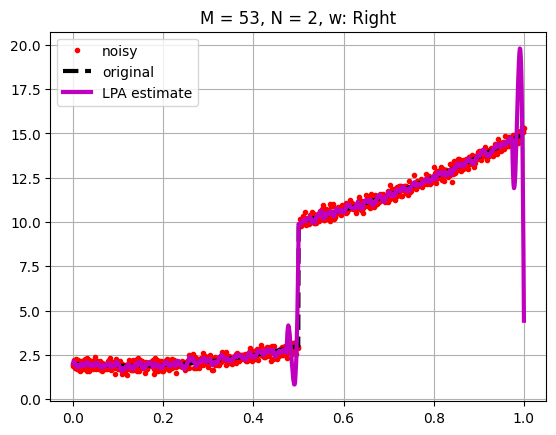

In [50]:
lpa(N, M, wr, s, "Right")